# Investigation of Nyquist criteria in the context of DEER using a Bayesian approach considering Nyquist for mean distance in wings of P(r)

This file starts with a low res time trace which barely fulfills Nyquist for the mean distance contained in P(r).
Then a simulation is run that uses a Nyquist frequency thats between the horn and wings of the Pake pattern of the frequency of the shortest distance in P(r) (approx. three detections points per horn oscillation, 1.5 per wing frequency oscillation).
Lastly a simulation is run with a time trace where the Nyquist is too low for either wing or horn frequency of Pake pattern.

## Load packages and setup constants

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl

In [ ]:
# Fundamental constants (CODATA 2018)
NA = 6.02214076e23 # Avogadro constant, mol^-1
muB = 9.2740100783e-24 # Bohr magneton, J/T
mu0 = 1.25663706212e-6 # magnetic constant, N A^-2 = T^2 m^3 J^-1
h = 6.62607015e-34 # Planck constant, J/Hz
ge = 2.00231930436256 # free-electron g factor
hbar = h/2/m.pi # reduced Planck constant, J/(rad/s)

w0 = 1e-7*(muB*ge)**2/hbar # rad s^-1

D = (mu0/4/m.pi)*(muB*ge)**2/hbar # dipolar constant, m^3 rad s^-1
D = D/1e6/2/np.pi #--> MHz


# Setup P(r) and determine frequencies for shortest r and mean distance

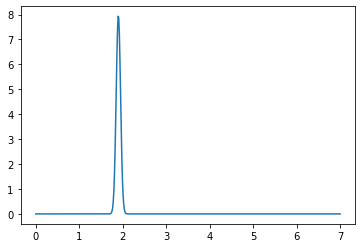

In [4]:
r = np.linspace(0.001,7,500)  

param = [1.9, 0.05]

P = dl.dd_gauss(r,param)

plt.plot(r,P);

In [5]:
idxmin = np.where(P>0.01)[0][0]
idxmean = np.where(P==max(P))[0][0]

rmin = (r[idxmin])
nu_perp = D/(rmin*1e-9)**3
nu_par = 2*nu_perp

print('shortest distance is ' + str(round(rmin,2)) + ' nm')
print('nu_perpendicular = ' + str(round(nu_perp,2)) + ' MHz')
print('nu_parallel = ' + str(round(nu_par,2)) + ' MHz')

rmin = (r[idxmean])
nu_perp = D/(rmin*1e-9)**3
nu_par = 2*nu_perp

print('mean distance is ' + str(round(rmin,2)) + ' nm')
print('nu_perpendicular = ' + str(round(nu_perp,2)) + ' MHz')
print('nu_parallel = ' + str(round(nu_par,2)) + ' MHz')

shortest distance is 1.73 nm
nu_perpendicular = 10.12 MHz
nu_parallel = 20.23 MHz
mean distance is 1.89 nm
nu_perpendicular = 7.65 MHz
nu_parallel = 15.31 MHz


# Experimental parameters (k, λ) and high resolution time trace

In [6]:
lam = 0.5                          # modulation depth
k = 0.01

tmax = 1

In [7]:
t_highres = np.linspace(0,tmax,500)

In [8]:
B_highres = dl.bg_exp(t_highres,k)         # background decay'
K_highres = dl.dipolarkernel(t_highres,r,mod=lam,bg=B_highres)    # kernel matrix

V_highres = K_highres@P + 0*dl.whitegaussnoise(t_highres,0.01,seed=0)  # DEER signal with added noise

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>mean,parallel</sub> < ν<sub>min,parallel</sub> << ν<sub>nyquist</sub>

In [9]:
t = np.linspace(0,tmax,50)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4 * dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

Timestep is 20.41 ns
Nyquist frequency is 24.5 MHz
The Nyquist distance is 1.62 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


In [10]:
B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

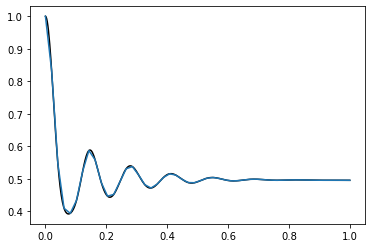

In [11]:
plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 145 seconds.
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
There were 890 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5399944493258642, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2380 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.19202454400623412, but should be close to 0.8. Try to increase the number of tuning steps.
There were 166 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.10731284585486521, but should be clos

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
k      0.003  0.002   0.000    0.007      0.001    0.001       6.0      61.0   
λ      0.503  0.001   0.501    0.505      0.000    0.000       6.0      10.0   
V₀     1.000  0.001   0.999    1.001      0.000    0.000      10.0      32.0   
σ      0.001  0.000   0.001    0.001      0.000    0.000       9.0     199.0   
δ      0.318  0.128   0.095    0.551      0.001    0.001   13267.0   18211.0   
lg(α) -3.395  0.115  -3.614   -3.182      0.027    0.019      18.0      49.0   

       r_hat  
k       1.65  
λ       1.64  
V₀      1.32  
σ       1.33  
δ       1.00  
lg(α)   1.14

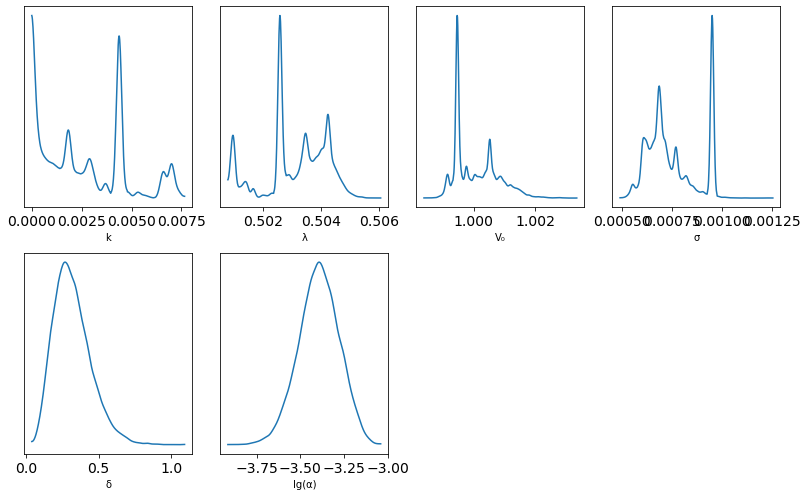

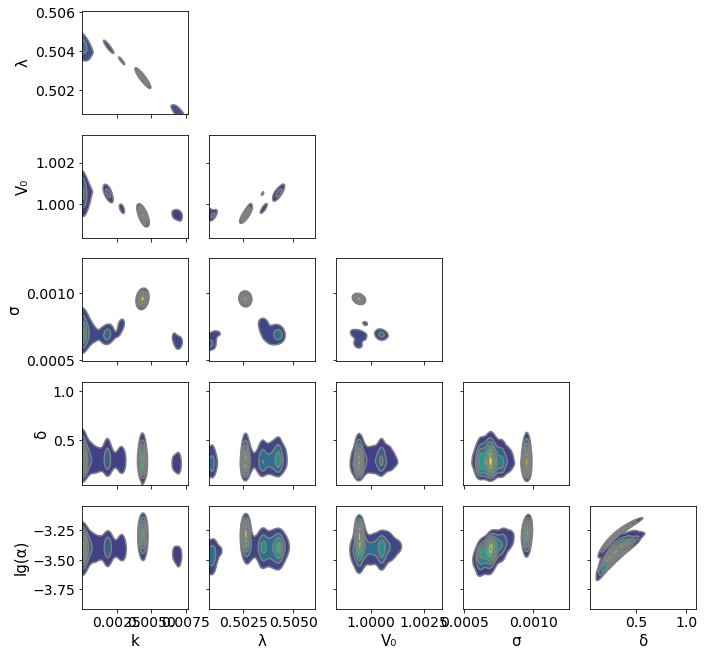

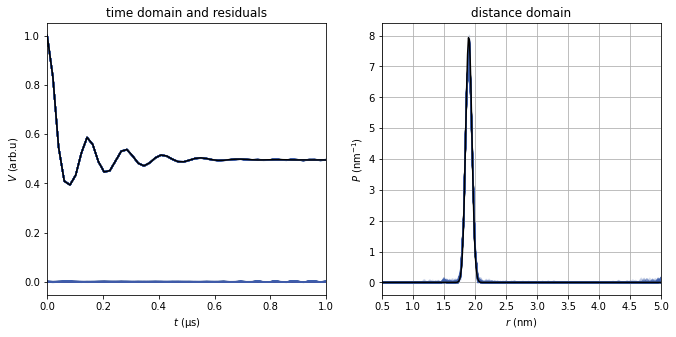

In [15]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>mean,parallel</sub> < ν<sub>min,parallel</sub> < ν<sub>nyquist</sub>

Timestep is 21.74 ns
Nyquist frequency is 23.0 MHz
The Nyquist distance is 1.65 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


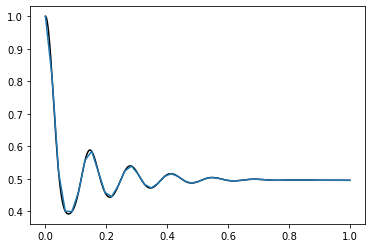

In [42]:
t = np.linspace(0,tmax,47)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4 * dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 271 seconds.
There were 2855 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2916260446371196, but should be close to 0.8. Try to increase the number of tuning steps.
There were 277 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7070096319508895, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4850 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.0011334084456887108, but should be close to 0.8. Try to increase the number of tuning steps.
There were 607 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2110565148771715, but should be

mean        sd  hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
k        0.004     0.006   0.000     0.011      0.001    0.001      35.0   
λ        0.506     0.009   0.499     0.533      0.002    0.002      15.0   
V₀       1.005     0.017   0.986     1.052      0.004    0.003      20.0   
σ        0.008     0.014   0.001     0.036      0.007    0.005       6.0   
δ      809.906  4544.157   0.037  3309.694    717.931  511.396       7.0   
lg(α)   -2.566     1.501  -3.678     0.345      0.742    0.570       7.0   

       ess_tail  r_hat  
k          27.0   1.23  
λ          28.0   2.70  
V₀         26.0   2.04  
σ          13.0   2.42  
δ          27.0   1.53  
lg(α)      27.0   1.56

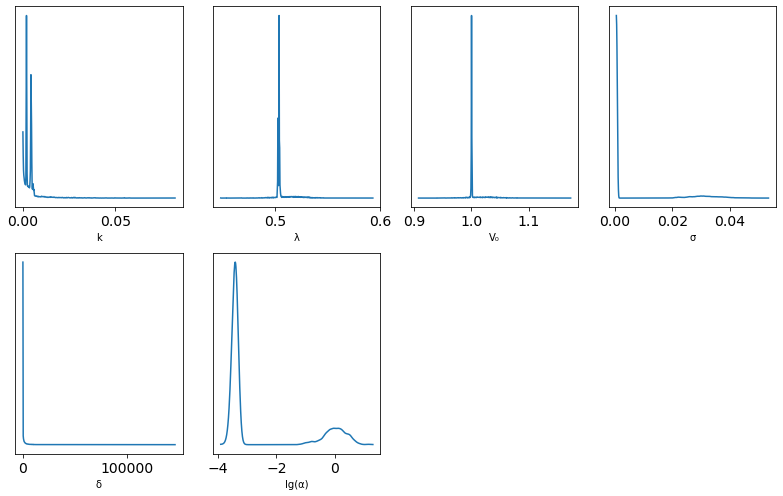

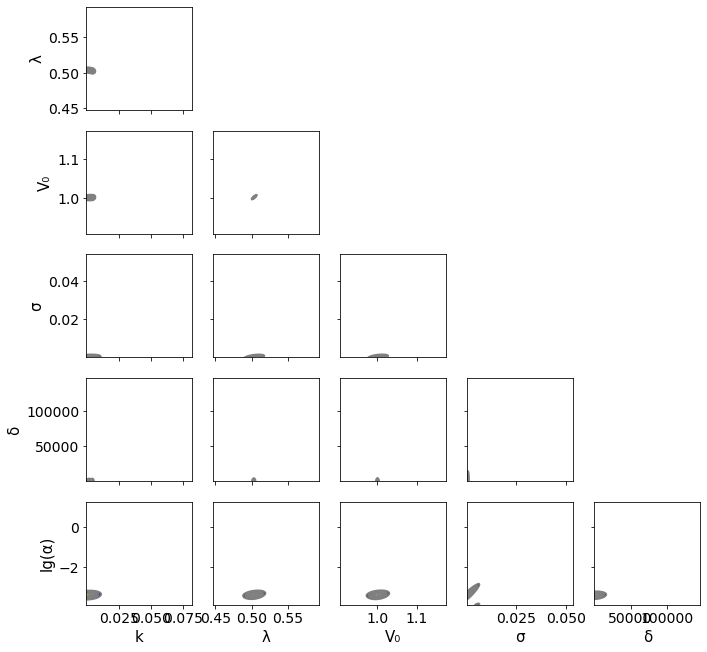

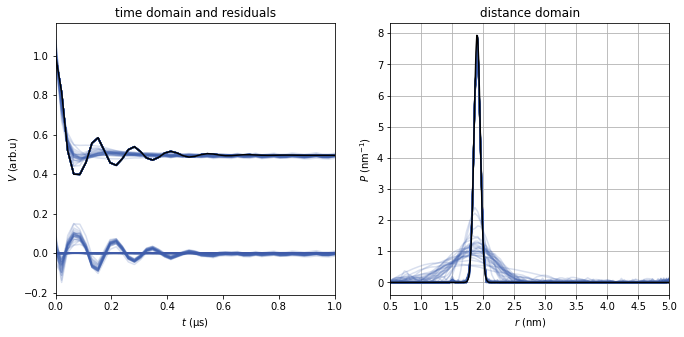

In [43]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

# ν<sub>mean,perpendicular</sub> < ν<sub>min,perpendicular</sub> < ν<sub>mean,parallel</sub> < ν<sub>nyquist</sub> < ν<sub>min,parallel</sub> 

Timestep is 25.0 ns
Nyquist frequency is 20.0 MHz
The Nyquist distance is 1.73 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


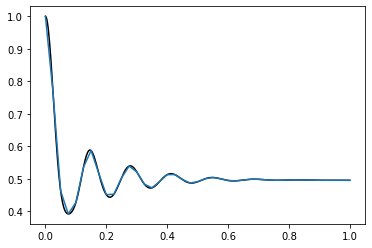

In [31]:
t = np.linspace(0,tmax,41)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4* dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

In [26]:
B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

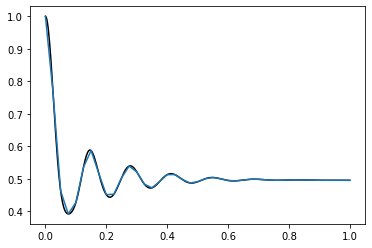

In [27]:
plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randDelta: [delta]
>NUTS: [k, V0, lamb, sigma]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 365 seconds.
The acceptance probability does not match the target. It is 0.9096617665865225, but should be close to 0.8. Try to increase the number of tuning steps.
There were 184 divergences after tuning. Increase `target_accept` or reparameterize.
There were 135 divergences after tuning. Increase `target_accept` or reparameterize.
There were 82 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


mean         sd  hdi_3%    hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
k          0.011      0.015   0.000      0.040      0.000    0.000    3724.0   
λ          0.509      0.019   0.471      0.543      0.000    0.000    3770.0   
V₀         1.010      0.036   0.941      1.075      0.001    0.000    4083.0   
σ          0.036      0.006   0.025      0.047      0.000    0.000     259.0   
δ      10376.727  13131.221  57.360  34087.049   1048.325  742.660     106.0   
lg(α)      0.374      0.375  -0.333      0.970      0.037    0.026     108.0   

       ess_tail  r_hat  
k        3813.0   1.00  
λ        3815.0   1.00  
V₀       4451.0   1.00  
σ         653.0   1.01  
δ         422.0   1.03  
lg(α)     416.0   1.03

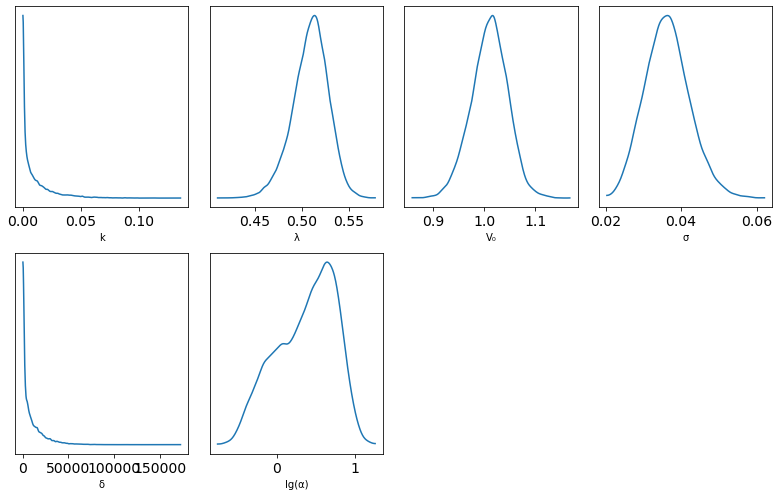

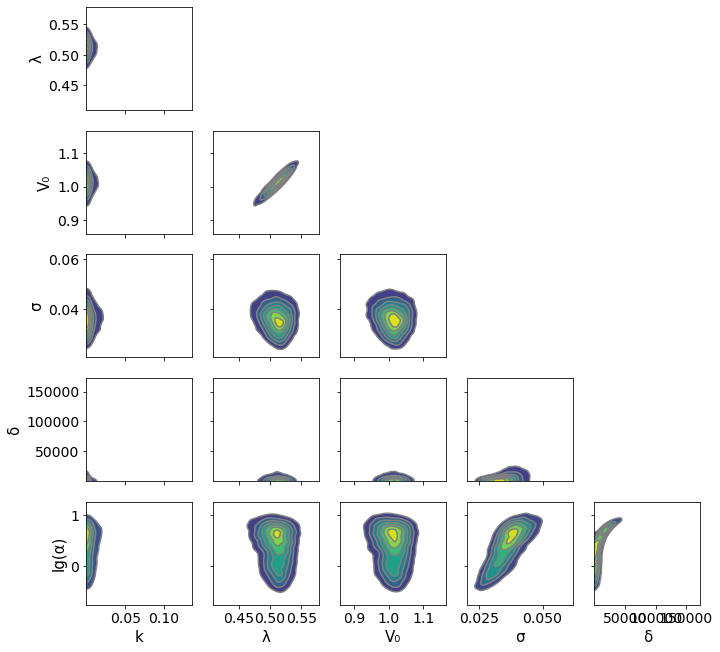

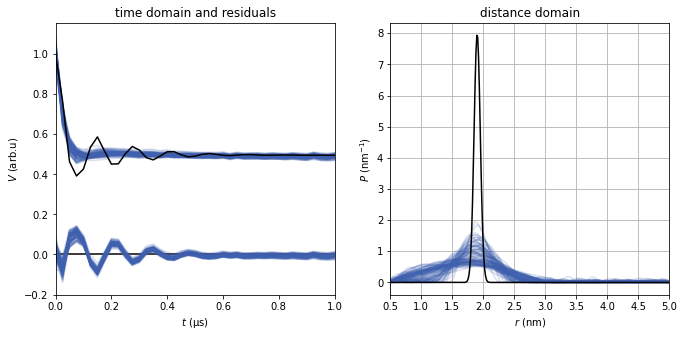

In [28]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

dive.summary(trace, model, Pref = P, rref = r)  

#  ν<sub>nyquist</sub> < ν<sub>parallel</sub>  < ν<sub>perpendicular</sub>

In [64]:
t = np.linspace(0,tmax,14)

dt = t[2]-t[1]
nu_nyquist = 1/2/dt
r_nyquist = (4 * dt * D)**(1/3)*1e9
nu_min = 2/max(t)

print('Timestep is ' + str(round(dt*1000,2)) + ' ns')
print('Nyquist frequency is ' + str(round(nu_nyquist,2)) + ' MHz')
print('The Nyquist distance is ' + str(round(r_nyquist,2)) + ' nm')
print('Total trace length is ' + str(round(max(t),2)) + ' µs, lowest detectable frequency: ' + str(round(nu_min,2)) + ' MHz')

Timestep is 76.92 ns
Nyquist frequency is 6.5 MHz
The Nyquist distance is 2.52 nm
Total trace length is 1.0 µs, lowest detectable frequency: 2.0 MHz


In [65]:
B = dl.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)    # kernel matrix

Vexp = K@P + 0*dl.whitegaussnoise(t,0.01,seed=0)  # DEER signal with added noise

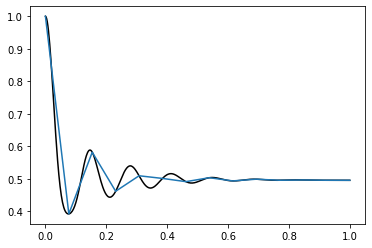

In [66]:
plt.plot(t_highres,V_highres,'k')
plt.plot(t,Vexp);

In [67]:
pars = {"method": 'regularization', "r": np.linspace(0.5,5,100)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

mean       sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
k        0.005    0.005   0.000    0.014      0.000    0.000    3432.0   
λ        0.503    0.010   0.484    0.521      0.000    0.000    3220.0   
V₀       0.998    0.018   0.964    1.033      0.000    0.000    3645.0   
σ        0.018    0.002   0.015    0.022      0.000    0.000    4126.0   
δ      202.240  160.927   2.632  490.532      3.532    2.498    1638.0   
lg(α)   -0.657    0.196  -1.030   -0.312      0.005    0.004    1667.0   

       ess_tail  r_hat  
k        3758.0   1.00  
λ        3719.0   1.00  
V₀       4533.0   1.00  
σ        4435.0   1.00  
δ        2823.0   1.01  
lg(α)    2830.0   1.01

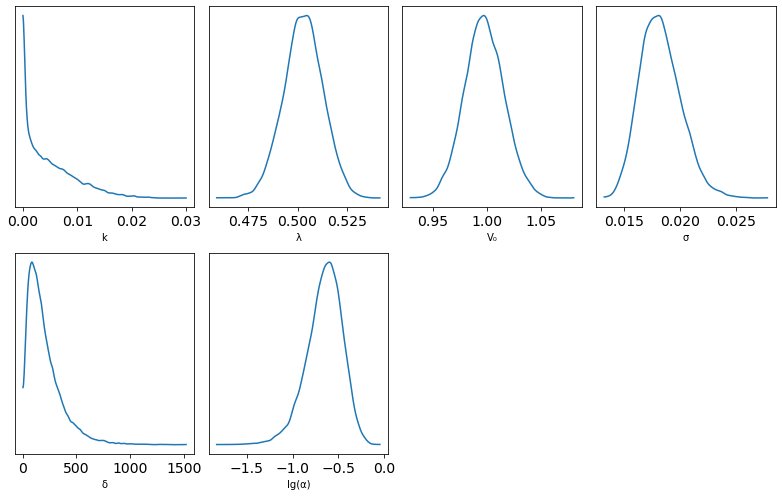

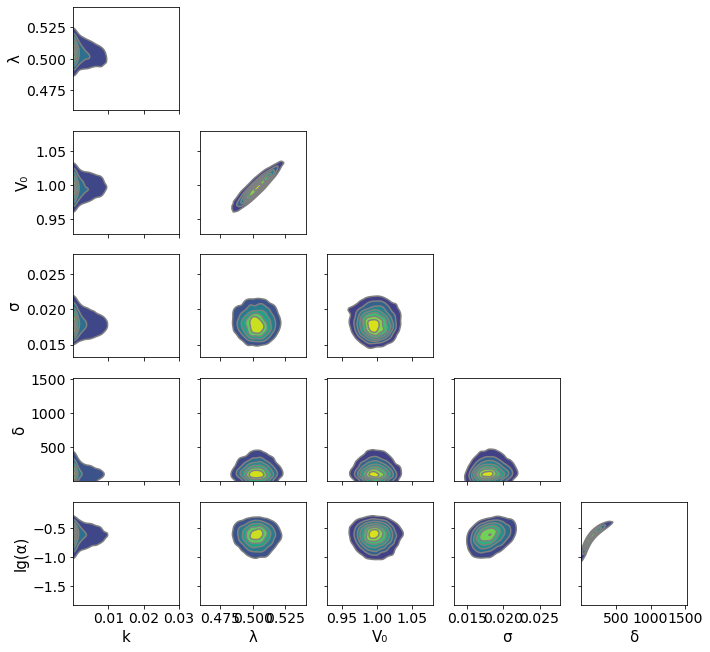

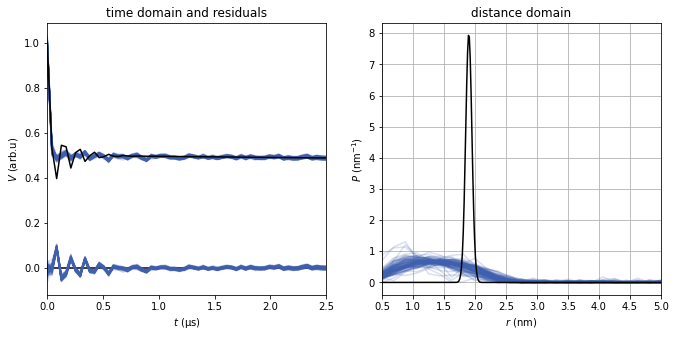

In [42]:
dive.summary(trace, model, Pref = P, rref = r)  